In [9]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import model
%matplotlib inline

# Vaccination

In [8]:
prep_data = model.data_and_network_prep()

In [12]:
data_for_fit_v = model.create_data_for_fit(prep_data)

In [55]:
data_for_fit_v['infected_data_agg'].iloc[0:27]

,vacc_count
2016-09-04,6.225525
2016-09-11,47.031705
2016-09-18,249.640260
2016-09-25,519.577041
2016-10-02,725.482958
2016-10-09,1662.311338
2016-10-16,2329.318482
2016-10-23,2360.643359
2016-10-30,2173.468821
2016-11-06,1699.354784


In [3]:
vacc_data = pd.read_csv('../../Data/vaccination_data/vaccinated_patients.csv')

In [99]:
vacc = vacc_data[vacc_data.vac_season==2016].sort_values('vac_date')[['random_ID', 'vac_date']]

In [111]:
(vacc[vacc.vac_date < '2016-06-01'].shape[0]/250000)*100

20.3488

In [140]:
israel_cum_vacc_coverage_2016 = np.array([0.1748, 0.232, 2.1128, 11.8312, 16.8152, 19.7312, 20.0876, 20.234, 20.2768, 20.3128, 20.3488])

In [100]:
israel_cum_vacc_coverage_2017 = np.array([0.146, 0.1496, 6.2776, 12.7656, 18.1612, 19.686, 19.9484, 19.9604, 19.9612, 19.9616, 19.962])

In [61]:
us_cum_vacc_coverage = np.array([ 0.6,  2.4,  9.3, 24.6, 32.4, 35.5, 38.3, 40. , 40.9, 41.4, 41.7])

In [126]:
df.columns

Index(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr',
       'May'],
      dtype='object')

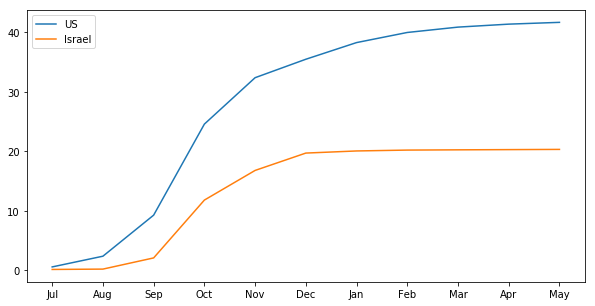

In [141]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(11), us_cum_vacc_coverage, label='US')
plt.plot(np.arange(11), israel_cum_vacc_coverage_2016, label='Israel')
plt.xticks(np.arange(11), ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr','May'])
plt.legend()
plt.show()

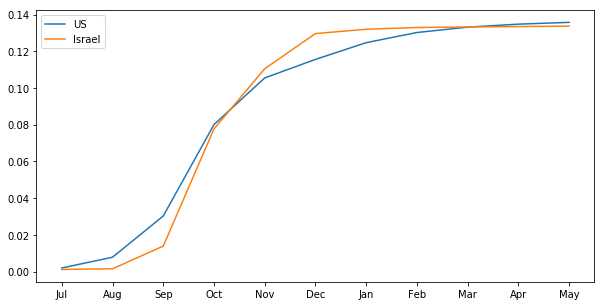

In [142]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(11), us_cum_vacc_coverage/us_cum_vacc_coverage.sum(), label='US')
plt.plot(np.arange(11), israel_cum_vacc_coverage_2016/israel_cum_vacc_coverage_2016.sum(), label='Israel')
plt.xticks(np.arange(11), ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr','May'])
plt.legend()
plt.show()

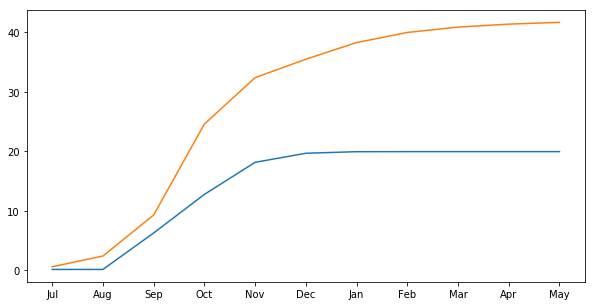

In [143]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(11), israel_cum_vacc_coverage_2017, label='Israel')
plt.plot(np.arange(11), us_cum_vacc_coverage, label='US')
plt.xticks(np.arange(11), ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr','May'])
plt.show()

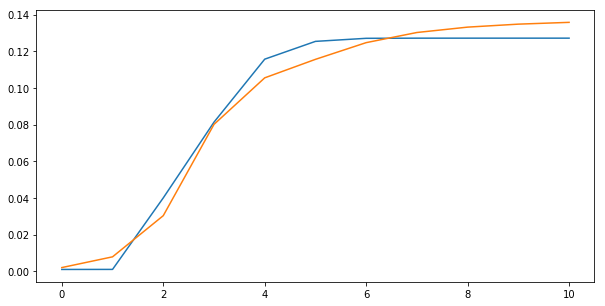

In [123]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(11), israel_cum_vacc_coverage_2017/israel_cum_vacc_coverage_2017.sum())
plt.plot(np.arange(11), us_cum_vacc_coverage/us_cum_vacc_coverage.sum())
plt.show()

In [65]:
israel_cum_vacc_coverage = np.array([0, 0, 0.015685, 0.102074, 0.147553, 0.164068, 0.16916, 0.170185, 0.170185, 0.170185, 0.170185])*100

# Flu

In [8]:
flu_cases_us = pd.read_csv('../../Data/influenza_model/data/AgeViewByWeek.csv')
flu_cases_us = flu_cases_us[['Year', ' Week', ' Age Group', 'total']].copy()
flu_cases_us.columns = ['year', 'week', 'age_group', 'total']

In [19]:
flu_cases_us = flu_cases_us.groupby(['year', 'week']).sum()[['total']]
flu_cases_us.sort_index(inplace=True)

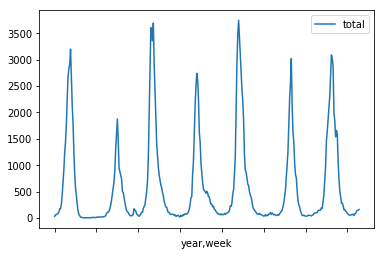

In [21]:
flu_cases_us.plot()

In [22]:
diagnoses = pd.read_csv('L:\Dor\Data\influenza_model\data\sample_diagnoses.txt')
diagnoses.diagnosis_code = diagnoses.diagnosis_code.map(lambda x: x.strip())

# Get only influenza cases
relevant_diagnosis_codes = set(['478.9', '482.2', '482.2', '487.0', '487  ', '487  ', '487.1', 'Y22844', 'Y14678', 'Y14678',
                                'Y14696', 'Y23242', 'Y23637', 'Y14697'])
influenza_diagnoses = diagnoses[diagnoses.diagnosis_code.isin(relevant_diagnosis_codes)].copy()

# Convert the date to TimeStamp object
influenza_diagnoses.date_diagnosis = influenza_diagnoses.date_diagnosis.map(lambda x: pd.Timestamp(year=int(str(x)[:4]), month=int(str(x)[4:6]), day=int(str(x)[6:])))

# Sort by date
influenza_diagnoses.sort_values('date_diagnosis', inplace=True)

# Add season column
influenza_diagnoses['season'] = influenza_diagnoses.date_diagnosis.map(lambda date: date.year+1 if date.month >=6 else date.year)

# Get only cases in last 5 seasons
influenza_diagnoses = influenza_diagnoses[influenza_diagnoses.season.isin([2011,2012,2013,2014,2015,2016,2017])].copy()
# influenza_diagnoses = influenza_diagnoses[influenza_diagnoses.season.isin([2013,2014,2015,2016,2017])].copy()  ### 5 SEASONS!!!


# Add age
# Load demographic data
demographic_data = pd.read_csv('L:\Dor\Data\influenza_model\data\sample_dem_data.txt')

# Add birth year to the diagnoses data
influenza_diagnoses = influenza_diagnoses.merge(demographic_data[['random_ID', 'birth_year', 'stat_code']], left_on='random_ID',
                                                right_on='random_ID')

# Add age at diagnosis date column
influenza_diagnoses['age'] = influenza_diagnoses.apply(lambda row: ((row.date_diagnosis.year - row.birth_year) > 18), axis=1).astype(int)

# Get only relevant columns
influenza_diagnoses = influenza_diagnoses[['random_ID', 'season', 'age', 'stat_code', 'date_diagnosis']].copy()
influenza_diagnoses.columns = ['random_ID', 'season', 'age', 'clinic_code', 'date_diagnosis']

# Sort by date
influenza_diagnoses.sort_values('date_diagnosis', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
# Group by date
influenza_cases = influenza_diagnoses.copy()
influenza_cases = influenza_cases.groupby('date_diagnosis').count()[['random_ID']]
influenza_cases.reset_index(inplace=True)
influenza_cases.columns = ['date_diagnosis', 'cases']

# # Add year and week
influenza_cases['year'] = influenza_cases.date_diagnosis.apply(lambda date: date.year)
influenza_cases['week'] = influenza_cases.date_diagnosis.apply(lambda date: date.week)

influenza_cases_weekly = influenza_cases.groupby(['year', 'week']).sum()[['cases']]
influenza_cases_weekly.sort_index(inplace=True)

# Resample weekly
# influenza_cases_weekly = influenza_cases.resample('W').sum()[['cases']].copy()
# influenza_cases_weekly.reset_index(inplace=True)

# influenza_cases_weekly.set_index(['year', 'week'], inplace=True)
# influenza_cases_weekly.sort_index(inplace=True)
# influenza_cases_weekly = influenza_cases_weekly[['cases']]

# Merge with US
influenza_cases_weekly = influenza_cases_weekly.merge(flu_cases_us, left_index=True, right_index=True)
influenza_cases_weekly.columns = ['Israel', 'US']

# Normalize
influenza_cases_weekly['Israel'] /= 250000
influenza_cases_weekly['US'] *= (100/320e6)

In [148]:
pearsonr(influenza_cases_weekly['Israel'], influenza_cases_weekly['US'])

(0.4670975944313579, 4.245857563069124e-20)

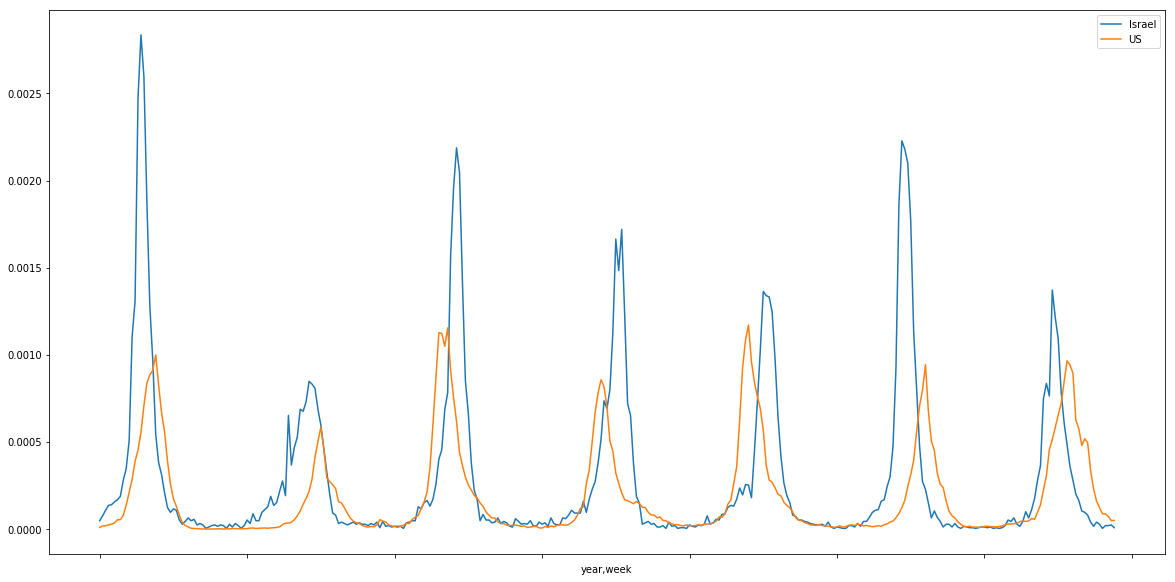

In [143]:
influenza_cases_weekly.plot(figsize=(20, 10))
plt.show()